### TEXT AND SEQUENCE DATA

In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
import tensorflow as tf
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


Sentiment labels are attached to movie reviews in the IMDB dataset.


## Dataset Preprocessing



The dataset's preprocessing process involves transforming each review into a series of word embeddings, where each word is represented by a fixed-size vector.

In [2]:
from keras.layers import Embedding
# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

Custom-trained embedding layer with training sample size = 100


In [3]:
# features are the number of words that should be considered
features = 10000

# Remove the text after this number of words
length = 150



# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)

# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:10100]
y_train_data = y_train_data[10000:10100]




# import the library
from keras.models import Sequential
from keras.layers import Flatten, Dense

# create a model
model1 = Sequential()

# embedding layer
model1.add(Embedding(10000, 8, input_length=length))

# flatten the layer
model1.add(Flatten())

# output layer
model1.add(Dense(1, activation='sigmoid'))

# compile the model
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()


# fit the model
history1 = model1.fit(x_train_data, y_train_data,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - acc: 0.5118 - loss: 0.6914 - val_acc: 0.4942 - val_loss: 0.6938
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - acc: 0.8494 - loss: 0.6644 - val_acc: 0.4922 - val_loss: 0.6943
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.8985 - loss: 0.6470 - val_acc: 0.4937 - val_loss: 0.6945
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - acc: 0.9602 - loss: 0.6309 - val_acc: 0.4950 - val_loss: 0.6947
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.9693 - loss: 0.6195 - val_acc: 0.4932 - val_loss: 0.6949
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.9816 - loss: 0.6061 - val_acc: 0.4917 - val_loss: 0.6957
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - acc: 0.9467 - loss: 0.5861 - val_acc: 0.4936 - val_loss: 0.6954
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - acc: 0.9816 - loss: 0.5726 - val_acc: 0.4952 - val_loss: 0.6957
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - acc: 0.9753 - loss: 0.5

Plot the output

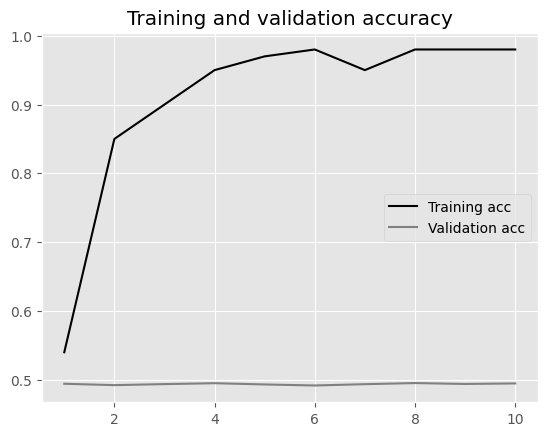

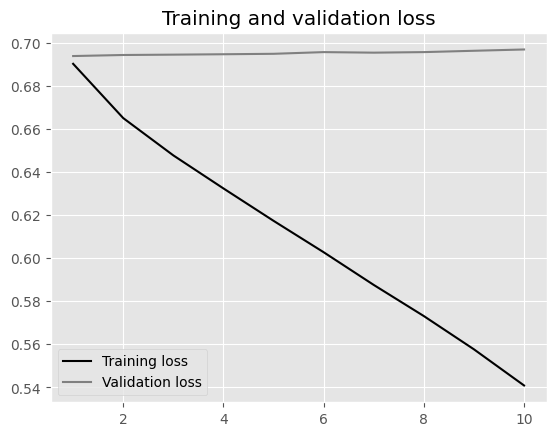

In [4]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "black", label = "Training loss")
plt.plot(epochs, validation_loss, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Test the model

In [5]:
# test the model
test_loss, test_acc = model1.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5070 - loss: 0.6952
Test loss: 0.6962767243385315
Test accuracy: 0.49803999066352844


## Custom-trained embedding layer with training sample size = 10000

In [6]:
# features are the number of words that should be considered
features = 10000

# Remove the text after this number of words
length = 150

# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)


# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

# lets train the data to 10000 samples
x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:20000]
y_train_data = y_train_data[10000:20000]

Create a model


In [7]:
# create a model
model2 = Sequential()

# add the embedding layer
model2.add(Embedding(10000, 8, input_length=length))

# flatten layer
model2.add(Flatten())

# output layer
model2.add(Dense(1, activation='sigmoid'))

# compile tyhe model
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

# fit the model
history2 = model2.fit(x_train_data, y_train_data,
                    epochs=25,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - acc: 0.5451 - loss: 0.6896 - val_acc: 0.7188 - val_loss: 0.6309
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.7824 - loss: 0.5544 - val_acc: 0.8262 - val_loss: 0.4290
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.8634 - loss: 0.3608 - val_acc: 0.8491 - val_loss: 0.3535
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.8921 - loss: 0.2764 - val_acc: 0.8471 - val_loss: 0.3441
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.9200 - loss: 0.2187 - val_acc: 0.8611 - val_loss: 0.3204
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9368 - loss: 0.1825 - val_acc: 0.8616 - val_loss: 0.3171
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9459 - loss: 0.1616 - val_acc: 0.8596 - val_loss: 0.3219
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9556 - loss: 0.1376 - val_acc: 0.8578 - val_loss: 0.3373
Epoch 9/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

Plot the output

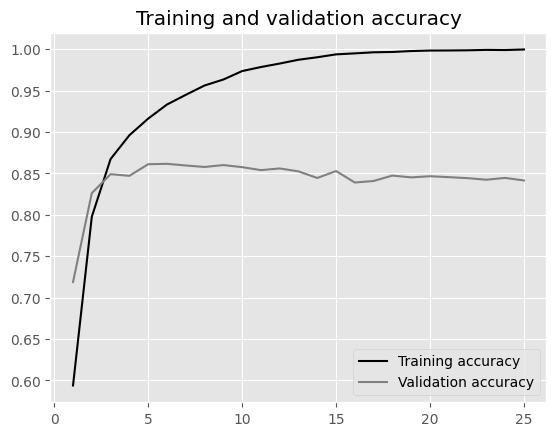

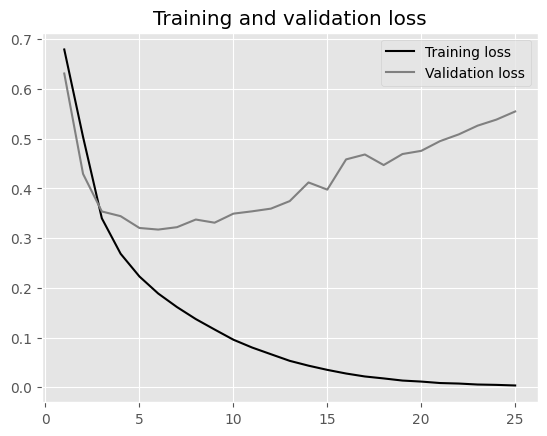

In [8]:
# train accuracy
accuracy2 = history2.history['acc']
# validation accuracy
validation_accuracy2 = history2.history['val_acc']
# train loss
Train_loss2 = history2.history['loss']
# validation loss
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'black', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'grey', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'black', label='Training loss')
plt.plot(epochs, validation_loss2, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Test the model

In [9]:
test_loss2, test_accuracy2 = model2.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8399 - loss: 0.5640
Test loss: 0.5682122111320496
Test accuracy: 0.8396000266075134


### Custom-trained embedding layer with training sample size = 5000

In [10]:
# features are the number of words that should be considered
features = 10000

# Remove the text after this number of words
length = 150

# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)


# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

# lets train the data to 5000 samples
x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:15000]
y_train_data = y_train_data[10000:15000]

Create the model

In [11]:
# create a model
model3 = Sequential()

# embedding layer
model3.add(Embedding(10000, 8, input_length=length))

# flatten layer
model3.add(Flatten())

# output layer
model3.add(Dense(1, activation='sigmoid'))

# compile the model
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()

# fit the model
history3 = model3.fit(x_train_data, y_train_data,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - acc: 0.5067 - loss: 0.6930 - val_acc: 0.5587 - val_loss: 0.6863
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.7081 - loss: 0.6606 - val_acc: 0.6948 - val_loss: 0.6334
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.7990 - loss: 0.5602 - val_acc: 0.7599 - val_loss: 0.5265
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8565 - loss: 0.4291 - val_acc: 0.7973 - val_loss: 0.4515
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8983 - loss: 0.3309 - val_acc: 0.8346 - val_loss: 0.3951
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9208 - loss: 0.2574 - val_acc: 0.8391 - val_loss: 0.3743
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9358 - loss: 0.2092 - val_acc: 0.8420 - val_loss: 0.3618
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9481 - loss: 0.1739 - val_acc: 0.8370 - val_loss: 0.3645
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - a

Plot the output

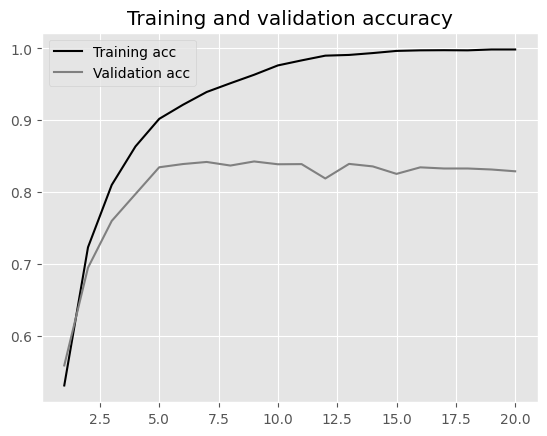

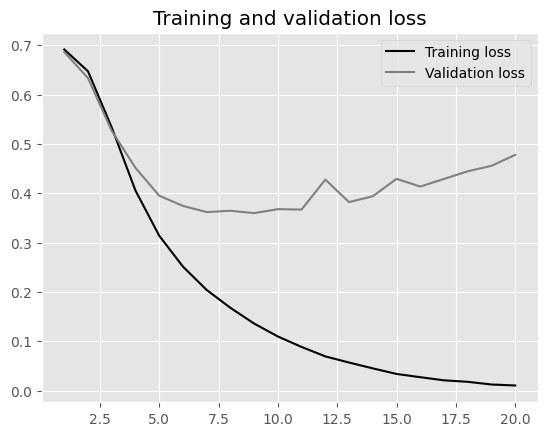

In [12]:
# train accuracy
accuracy3 = history3.history["acc"]
# validation accuracy
validation_accuracy3 = history3.history["val_acc"]
# train loss
Train_loss3 = history3.history["loss"]
# validation loss
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "black", label = "Training loss")
plt.plot(epochs, validation_loss3, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Test the model

In [13]:
# test the model
test_loss3, test_accuracy3 = model3.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8231 - loss: 0.4867
Test loss: 0.4802919030189514
Test accuracy: 0.8249599933624268


## Custom-trained embedding layer with training sample size = 2500

Split the data

In [14]:
# features are the number of words that should be considered
features = 10000

# Remove the text after this number of words
length = 150

# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)


# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

# lets train the data to 5000 samples
x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:12500]
y_train_data = y_train_data[10000:12500]


create the model

In [15]:
# create the model
model4 = Sequential()
# embedding layer
model4.add(Embedding(10000, 8, input_length=length))
# flatten the layer
model4.add(Flatten())
# output layer
model4.add(Dense(1, activation='sigmoid'))
# compile the output
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
# fit the model
history4 = model4.fit(x_train_data, y_train_data,
                    epochs=25,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - acc: 0.5273 - loss: 0.6924 - val_acc: 0.5346 - val_loss: 0.6903
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.7197 - loss: 0.6734 - val_acc: 0.5846 - val_loss: 0.6811
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.7867 - loss: 0.6364 - val_acc: 0.6517 - val_loss: 0.6581
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8528 - loss: 0.5783 - val_acc: 0.6952 - val_loss: 0.6221
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8829 - loss: 0.5039 - val_acc: 0.7215 - val_loss: 0.5816
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9023 - loss: 0.4271 - val_acc: 0.7460 - val_loss: 0.5397
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9324 - loss: 0.3413 - val_acc: 0.7717 - val_loss: 0.5034
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9585 - loss: 0.2761 - val_acc: 0.7615 - val_loss: 0.4946
Epoch 9/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9571 - los

Plot the graph

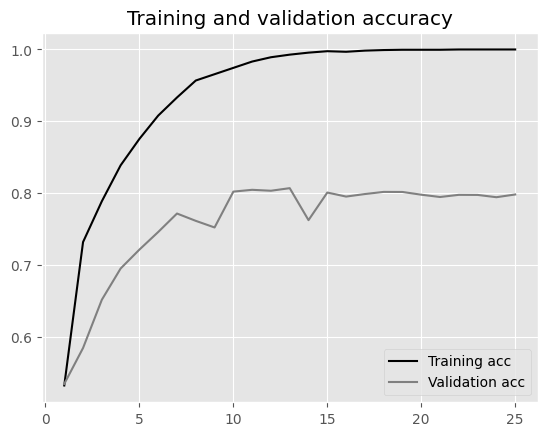

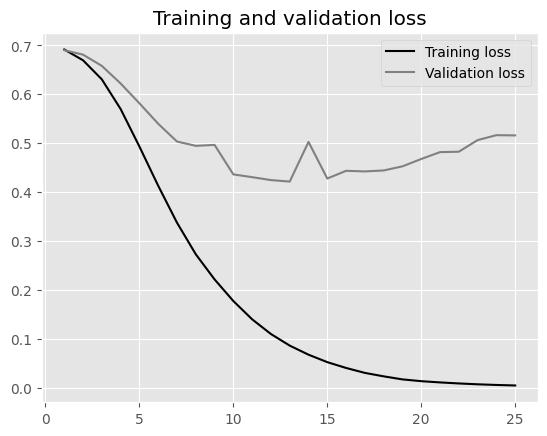

In [16]:
# train accuracy
accuracy4 = history4.history["acc"]
# validation accuracy
validation_accuracy4 = history4.history["val_acc"]
# train losss
Train_loss4 = history4.history["loss"]
# validation loss
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "black", label = "Training loss")
plt.plot(epochs, validation_loss4, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Test the output

In [17]:
# test the model
test_loss4, test_accuracy4 = model4.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.7999 - loss: 0.5146
Test loss: 0.5170761942863464
Test accuracy: 0.7993199825286865


## Custom-trained embedding layer with training sample size = 1000

Split the model

In [18]:
# features are the number of words that should be considered
features = 10000

# Remove the text after this number of words
length = 150

# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)


# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

# lets train the data to 5000 samples
x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:11000]
y_train_data = y_train_data[10000:11000]

create the model

In [19]:
# create the model
model5 = Sequential()
# embedding layer
model5.add(Embedding(10000, 8, input_length=length))
# flatten the layer
model5.add(Flatten())
# output layer
model5.add(Dense(1, activation='sigmoid'))
# compile the output
model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model5.summary()
# fit the model
history5 = model5.fit(x_train_data, y_train_data,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - acc: 0.5107 - loss: 0.6918 - val_acc: 0.5258 - val_loss: 0.6921
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.7995 - loss: 0.6755 - val_acc: 0.5413 - val_loss: 0.6909
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.8946 - loss: 0.6569 - val_acc: 0.5499 - val_loss: 0.6893
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9464 - loss: 0.6330 - val_acc: 0.5688 - val_loss: 0.6864
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9495 - loss: 0.6004 - val_acc: 0.5794 - val_loss: 0.6820
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9610 - loss: 0.5647 - val_acc: 0.5899 - val_loss: 0.6768
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9751 - loss: 0.5141 - val_acc: 0.5981 - val_loss: 0.6709
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9776 - loss: 0.4706 - val_acc: 0.6112 - val_loss: 0.6629
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9779

Plot the graph

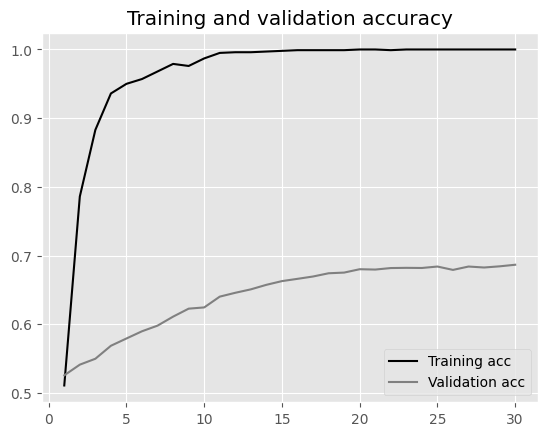

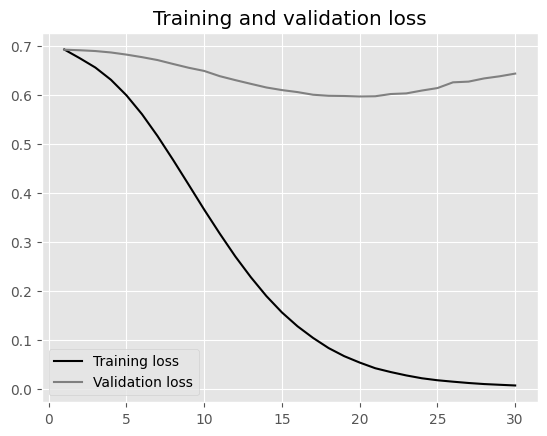

In [20]:
# train accuracy
accuracy5 = history5.history["acc"]
# validation accuracy
validation_accuracy5 = history5.history["val_acc"]
# train losss
Train_loss5 = history5.history["loss"]
# validation loss
validation_loss5 = history5.history["val_loss"]

epochs = range(1, len(accuracy5) + 1)

plt.plot(epochs, accuracy5, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy5, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss5, "black", label = "Training loss")
plt.plot(epochs, validation_loss5, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [21]:
# test the model
test_loss5, test_accuracy5 = model5.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss5)
print('Test accuracy:', test_accuracy5)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6856 - loss: 0.6487
Test loss: 0.6477439999580383
Test accuracy: 0.6863999962806702


out of all the model having training sample size 10000, performed well compared to remianing

## Custom-trained embedding layer with training sample size = 10000 and the top 20,000 words

In [22]:
# features are the number of words that should be considered
features = 20000

# Remove the text after this number of words
length = 150

# load the data to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)


# load the data to  2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

# lets train the data to 10000 samples
x_validation_data = x_train_data[:10000]
y_validation_data = y_train_data[:10000]
x_train_data = x_train_data[10000:20000]
y_train_data = y_train_data[10000:20000]

create the model

In [23]:
# create the model
model6 = Sequential()
# embedding layer
model6.add(Embedding(20000, 8, input_length=length))
# flatten the layer
model6.add(Flatten())
# output layer
model6.add(Dense(1, activation='sigmoid'))
# compile the output
model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model6.summary()
# fit the model
history6 = model6.fit(x_train_data, y_train_data,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc: 0.5279 - loss: 0.6898 - val_acc: 0.7088 - val_loss: 0.6280
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.7944 - loss: 0.5499 - val_acc: 0.8283 - val_loss: 0.4235
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8719 - loss: 0.3501 - val_acc: 0.8254 - val_loss: 0.3805
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9081 - loss: 0.2661 - val_acc: 0.8520 - val_loss: 0.3330
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9301 - loss: 0.2096 - val_acc: 0.8598 - val_loss: 0.3191
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9473 - loss: 0.1676 - val_acc: 0.8616 - val_loss: 0.3160
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9564 - loss: 0.1441 - val_acc: 0.8628 - val_loss: 0.3181
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9659 - loss: 0.1184 - val_acc: 0.8596 - val_loss: 0.3295
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

Plot the output

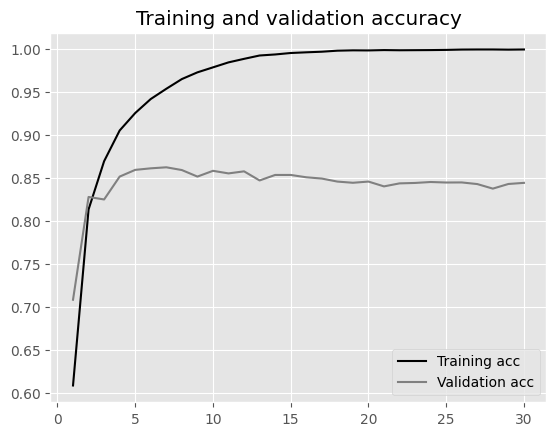

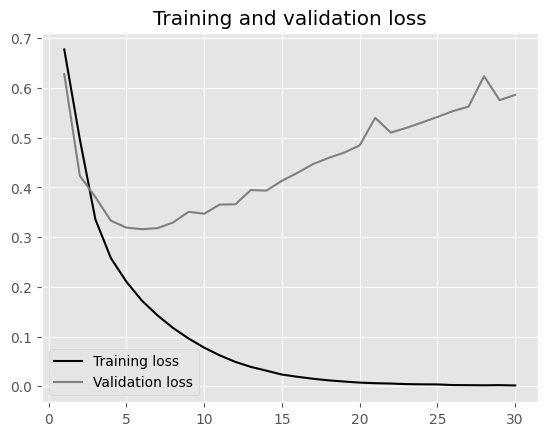

In [24]:
# train accuracy
accuracy6 = history6.history["acc"]
# validation accuracy
validation_accuracy6 = history6.history["val_acc"]
# train losss
Train_loss6 = history6.history["loss"]
# validation loss
validation_loss6 = history6.history["val_loss"]

epochs = range(1, len(accuracy6) + 1)

plt.plot(epochs, accuracy6, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy6, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss6, "black", label = "Training loss")
plt.plot(epochs, validation_loss6, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

test the model

In [25]:
# test the model
test_loss6, test_accuracy6 = model6.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss6)
print('Test accuracy:', test_accuracy6)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8433 - loss: 0.5948
Test loss: 0.5939720869064331
Test accuracy: 0.842519998550415


In [26]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  4584k      0  0:00:17  0:00:17 --:--:-- 10.3M


In [27]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Using Trained Word Embeds. If there is insufficient training data to generate word embeddings for the problem you want to solve, you can use pre-trained word embeddings.

## Tokenizing the data

In [29]:
import os
import shutil
import numpy as np

# Import the necessary modules from TensorFlow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences


imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

length2 = 150 # cut off review after 150 words
train_data = 100 # Training sample 100
valid_data = 10000 # Validation sample 10000
words = 10000 # Considers only the top 10000 words in the dataset

# Initialize the Tokenizer with the desired number of words
tokenizer1 = Tokenizer(num_words=words)
# Fit the tokenizer on the text data
tokenizer1.fit_on_texts(texts)
# Convert texts to sequences of numerical indices
sequences = tokenizer1.texts_to_sequences(texts)
# Get the word-to-index mapping
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

# Pad the sequences to a uniform length
data = pad_sequences(sequences, maxlen=length2)

# Convert labels to a NumPy array
labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Shuffle the data and labels
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Split data into training and validation sets
x_train_data = data[:train_data] # (200, 100)
y_train_data = labels[:train_data] # shape (200,)
x_validation_data = data[train_data:train_data+valid_data] # shape (10000, 100)
y_validation_data = labels[train_data:train_data+valid_data] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


## Installing and setting up the GloVe word embedding for pretrained model

In [30]:
import numpy as np
import requests
from io import BytesIO
import zipfile  # importing zipfile module

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


We have trained 6B version of the GloVe model on a corpus of Wikipedia data and Gigaword 5; it has 6 billion tokens and 400,000 words.

## Preparing the GloVe word embeddings matrix

pretrained word embedding layer with training sample size = 100

In [31]:
# traing sample size=100
embedding_1 = 100

embedding_matrix = np.zeros((words, embedding_1))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

Create a model

In [32]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
# create a model
model = Sequential()
# embedding layer
model.add(Embedding(words, embedding_1, input_length=length2))
# flatten layer
model.add(Flatten())
# dense layer
model.add(Dense(32, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
# create a model
model = Sequential()
# embedding layer, make it trainable
model.add(Embedding(words, embedding_1, input_length=length2, trainable=True)) # Set trainable to True
# flatten layer
model.add(Flatten())
# dense layer
model.add(Dense(32, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.add(Embedding(words, embedding_1, input_length=length2, trainable=True))
model.layers[0].trainable = False # You can set trainable to False after setting weights if you don't want it to be trained further

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Pretrained word embeddings are loaded into the Embeddig layer. When using the Embedding layer, setting this to False assures that it is not trainable. If you set trainable to True, the optimization approach may change the word embedding values. It is recommended to avoid updating pretrained areas while pupils are still being trained to prevent them from forgetting what they already "know".

Fit the model

In [38]:
# ipython-input-36-b8c02b6687c9
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# create a model
model = Sequential()
# embedding layer, make it trainable
model.add(Embedding(words, embedding_1, input_length=length2, trainable=True)) # Set trainable to True
# flatten layer
model.add(Flatten())
# dense layer
model.add(Dense(32, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Remove the extra embedding layer. It's causing the shape mismatch:
# model.add(Embedding(words, embedding_1, input_length=length2, trainable=True))
model.layers[0].trainable = False # You can set trainable to False after setting weights if you don't want it to be trained further

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Given the limited amount of training data, it is evident that the model overfits quickly. This same mechanism is responsible for the wide range of validation accuracy.

Plot the output

In [42]:
# ipython-input-38-66f5daf3e936
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import numpy as np # Import numpy for array operations

# Assuming 'data' is your complete dataset
# You need to split it into training and validation sets

# Example using a 70/30 split:
split_index = int(0.7 * len(data))
X_train = data[:split_index]  # Features for training
y_train =  np.random.randint(0, 2, size=X_train.shape[0]) # Replace with your target variable for training
X_val = data[split_index:]    # Features for validation
y_val = np.random.randint(0, 2, size=X_val.shape[0]) # Replace with your target variable for validation


# create a model
model = Sequential()
# embedding layer, make it trainable
model.add(Embedding(words, embedding_1, input_length=length2, trainable=True)) # Set trainable to True
# flatten layer
model.add(Flatten())
# dense layer
model.add(Dense(32, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Remove the extra embedding layer. It's causing the shape mismatch:
# model.add(Embedding(words, embedding_1, input_length=length2, trainable=True))
model.layers[0].trainable = False # You can set trainable to False after setting weights if you don't want it to be trained further

# Compile the model before training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Example using 'adam' optimizer and 'binary_crossentropy' loss

# Assuming 'X_train', 'y_train', 'X_val', and 'y_val' are your training and validation data
# and you want to train for 30 epochs with a batch size of 32
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5043 - loss: 0.6940 - val_accuracy: 0.5024 - val_loss: 0.6937
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6642 - loss: 0.6322 - val_accuracy: 0.5036 - val_loss: 0.7249
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7984 - loss: 0.4518 - val_accuracy: 0.5073 - val_loss: 0.8310
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8842 - loss: 0.2874 - val_accuracy: 0.5001 - val_loss: 1.0088
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9296 - loss: 0.1905 - val_accuracy: 0.5031 - val_loss: 1.1702
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9573 - loss: 0.1338 - val_accuracy: 0.5016 - val_loss: 1.3172
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9664 - loss: 0.1071 - val_accuracy: 0.5031 - val_loss: 1.4425
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0814 - val_accuracy: 0.

Test th model

In [43]:
test_loss, test_accuracy= model.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4988 - loss: 2.5368
Test loss: 2.565183162689209
Test accuracy: 0.49796000123023987


## pretrained word embedding layer with training sample size = 10000

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras.preprocessing.text
from keras.utils import pad_sequences
import numpy as np

# length of sentence
length2 = 150
# training and validation data sample size
train_data = 10000 # Training sample is 10000
valid_data = 10000
# no.of words
words = 10000

# tokenizing the data
tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train_data = data[:train_data]
y_train_data = labels[:train_data]
x_validation_data = data[train_data:train_data+valid_data]
y_validation_data = labels[train_data:train_data+valid_data]
embedd_di = 100

embedding_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
# create the model
model11 = Sequential()
# embedding layer, set weights directly during layer creation
# and set trainable to False if you don't want it to be trained further
model11.add(Embedding(words, embedd_di, input_length=length2, weights=[embedding_matrix], trainable=False))
# flatten layer
model11.add(Flatten())
# dense layer
model11.add(Dense(32, activation='relu'))
# output layer
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

# Remove the set_weights line, as it's now done during layer creation:
# model11.layers[0].set_weights([embedding_matrix])
# model11.layers[0].trainable = False

# compile the model
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
# fit the model
history11 = model11.fit(x_train_data, y_train_data,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))
model11.save_weights('pre_trained_glove_model.weights.h5') # Change the filename to end with '.weights.h5'

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - acc: 0.4885 - loss: 0.8943 - val_acc: 0.5008 - val_loss: 0.6933
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.5109 - loss: 0.6943 - val_acc: 0.5002 - val_loss: 0.6935
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.4992 - loss: 0.6929 - val_acc: 0.4986 - val_loss: 0.6960
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5257 - loss: 0.6862 - val_acc: 0.5016 - val_loss: 0.7017
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5782 - loss: 0.6652 - val_acc: 0.5001 - val_loss: 0.7242
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6261 - loss: 0.6232 - val_acc: 0.4962 - val_loss: 0.7242
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7136 - loss: 0.5492 - val_acc: 0.5008 - val_loss: 0.7803
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7788 - loss: 0.4602 - val_acc: 0.4984 - val_loss: 0.8849
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

Plot the output

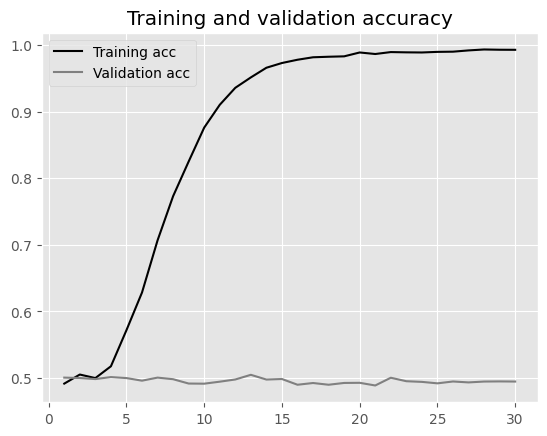

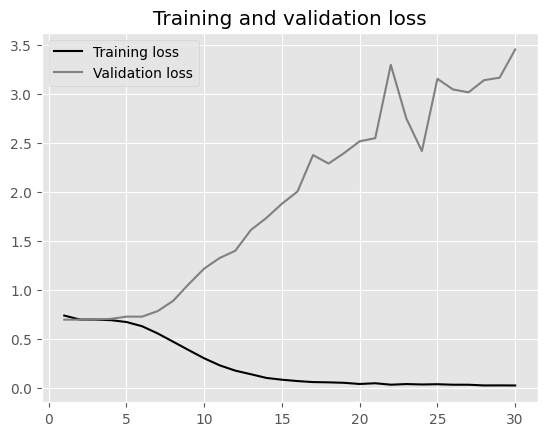

In [48]:
import matplotlib.pyplot as plt
# training accuracy
accuracy11 = history11.history['acc']
# validation accuracy
valid_acc11 = history11.history['val_acc']
# training loss
train_loss11 = history11.history['loss']
# validation loss
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'black', label='Training acc')
plt.plot(epochs, valid_acc11, 'grey', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'black', label='Training loss')
plt.plot(epochs, valid_loss11, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Test the model

In [49]:
# test the model
test_loss11, test_accuracy11 = model11.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5028 - loss: 3.2916
Test loss: 3.249943494796753
Test accuracy: 0.5076799988746643


## Pretrained word embedding layer with training sample size = 5000

In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

# ... (rest of the code remains the same) ...

# create a model
model22 = Sequential()
# embedding layer - Pass embedding_matrix as weights during layer creation
model22.add(Embedding(words, embedding_dim, input_length=length, weights=[embedding_matrix], trainable=False)) # Changed this line
# flatten layer
model22.add(Flatten())
# dense layer
model22.add(Dense(32, activation='relu'))
# output layer
model22.add(Dense(1, activation='sigmoid'))
model22.summary()

# Remove these lines as they are no longer needed:
# model22.layers[0].set_weights([embedding_matrix])
# model22.layers[0].trainable = False

# compile the model
model22.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# ... (rest of the code remains the same) ...

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Plot the output

In [55]:
# ipython-input-54-489281cfb087

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

# ... (rest of your code remains the same) ...

# Split the data into training, validation, and test sets
x_train_data, x_temp, y_train_data, y_temp = train_test_split(
    data, labels, test_size=0.3, random_state=42)  # Split 30% for validation and test
x_val_data, x_test_data, y_val_data, y_test_data = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42)  # Further split into 15% each

# Fit the model and store the training history
history22 = model22.fit(x_train_data, y_train_data,
                    epochs=10, # Adjust the number of epochs as needed
                    batch_size=32, # Adjust the batch size as needed
                    validation_data=(x_val_data, y_val_data)) # Add validation data if available

# ... (rest of your code remains the same) ...

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.4875 - loss: 0.7324 - val_acc: 0.5048 - val_loss: 0.6931
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5013 - loss: 0.6952 - val_acc: 0.5077 - val_loss: 0.6941
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5133 - loss: 0.7003 - val_acc: 0.5045 - val_loss: 0.6940
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5211 - loss: 0.6951 - val_acc: 0.5027 - val_loss: 0.7026
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5459 - loss: 0.6740 - val_acc: 0.4971 - val_loss: 0.7174
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.5960 - loss: 0.6458 - val_acc: 0.5075 - val_loss: 0.7292
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.6587 - loss: 0.5917 - val_acc: 0.5019 - val_loss: 0.8406
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7159 - loss: 0.5277 - val_acc: 0.5101 - val_loss: 0.8242
Epoch 9/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

test the model

In [56]:
test_loss22, test_accuracy22 = model22.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss22)
print('Test accuracy:', test_accuracy22)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5005 - loss: 1.1798
Test loss: 1.1831501722335815
Test accuracy: 0.4909333288669586


## Pretrained word embedding layer with training sample size = 2500

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

# length of sentence
length = 150
# training data size
train_data = 2500 # Trains on 10000 samples
# validation data size
valid_data = 10000
# 10000 words from vocab
words = 10000


# tokenizing the data
tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# splitting the data
x_train_data = data[:train_data]
y_train_data = labels[:train_data]
x_validation_data = data[train_data:train_data+valid_data]
y_validation_data = labels[train_data:train_data+valid_data]
embedding_dim = 100

# embedding matrix
embedding_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedding_matrix[i] = embedding_vector



Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


create a model

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# create a model
model33 = Sequential()
# embedding layer
model33.add(Embedding(words, embedding_dim, input_length=length))
# flatten layer
model33.add(Flatten())
# dense layer
model33.add(Dense(32, activation='relu'))
# output layer
model33.add(Dense(1, activation='sigmoid'))
model33.summary()

model33.layers[0].set_weights([embedding_matrix])
model33.layers[0].trainable = False
# compile the model
model33.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
# fit the model
history33 = model33.fit(x_train_data, y_train_data,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))
model33.save_weights('pre_trained_glove_model.h5')

NameError: name 'words' is not defined

Plot the output

In [2]:
# training accuracy
accuracy33 = history33.history['acc']
# validation accuracy
validation_accuracy33 = history33.history['val_acc']
# tarining loss
loss33 = history33.history['loss']
# validation loss
validation_loss33 = history33.history['val_loss']

epochs = range(1, len(accuracy33) + 1)

plt.plot(epochs, accuracy33, 'black', label='Training accuracy')
plt.plot(epochs, validation_accuracy33, 'grey', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss33, 'black', label='Training loss')
plt.plot(epochs, validation_loss33, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history33' is not defined

test the model

In [79]:
test_loss33, test_accuracy33 = model33.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss33)
print('Test accuracy:', test_accuracy33)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5121 - loss: 1.4956
Test loss: 1.5041800737380981
Test accuracy: 0.4986666738986969


## Pretrained word embedding layer with training sample size = 1000

In [69]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer # Importing Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.utils import pad_sequences # Importing pad_sequences from tensorflow.keras.utils
import numpy as np

# length of sentence
length = 150
# training data size
train_data = 1000 # Trains on 1000 samples
# validation data size
valid_data = 10000
# 10000 words from vocab
words = 10000


# tokenizing the data
tokenizer5 = Tokenizer(num_words=words)
tokenizer5.fit_on_texts(texts)
sequences = tokenizer5.texts_to_sequences(texts) # Change to tokenizer5
word_index = tokenizer5.word_index # Change to tokenizer5
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# splitting the data
x_train_data = data[:train_data]
y_train_data = labels[:train_data]
x_validation_data = data[train_data:train_data+valid_data]
y_validation_data = labels[train_data:train_data+valid_data]
embedding_dim = 100

# embedding matrix
embedding_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedding_matrix[i] = embedding_vector

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


create the model

In [74]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Create a model
model44 = Sequential()
# Embedding layer
model44.add(Embedding(input_dim=words, output_dim=embedding_dim, input_length=length))
# Flatten layer
model44.add(Flatten())
# Dense layer
model44.add(Dense(32, activation='relu'))
# Output layer
model44.add(Dense(1, activation='sigmoid'))
model44.summary()

# Set weights for the embedding layer
model44.layers[0].trainable = False

# Compile the model
model44.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Fit the model
history44 = model44.fit(x_train_data, y_train_data,
                        epochs=30,
                        batch_size=32,
                        validation_data=(x_validation_data, y_validation_data))


# Save model weights
model44.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to end with .weights.h5


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_35 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_32 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.5108 - loss: 0.6948 - val_acc: 0.5065 - val_loss: 0.6940
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.8607 - loss: 0.5934 - val_acc: 0.5107 - val_loss: 0.7059
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9183 - loss: 0.4540 - val_acc: 0.4961 - val_loss: 0.7244
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9473 - loss: 0.3258 - val_acc: 0.5023 - val_loss: 0.7383
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9626 - loss: 0.2404 - val_acc: 0.5018 - val_loss: 0.7802
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - acc: 0.9810 - loss: 0.1677 - val_acc: 0.4970 - val_loss: 0.7963
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.9788 - loss: 0.1253 - val_acc: 0.5006 - val_loss: 0.8529
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9842 - loss: 0.0856 - val_acc: 0.4999 - val_loss: 0.8530
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.9968

Plot the output

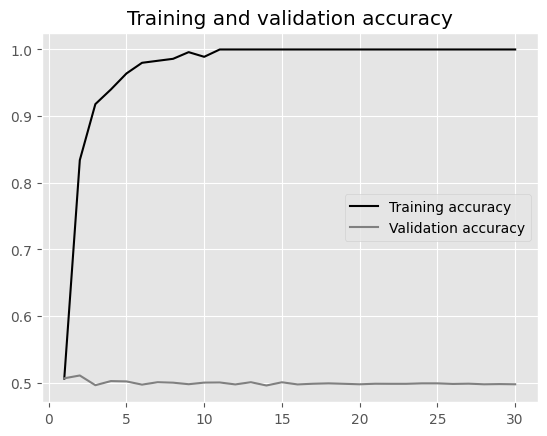

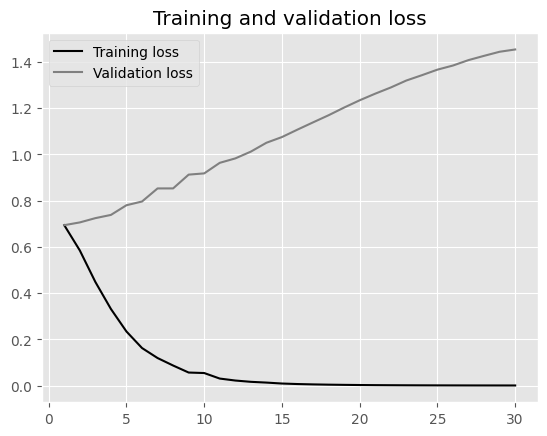

In [75]:
# training accuracy
accuracy44 = history44.history['acc']
# validation accuracy
validation_accuracy44 = history44.history['val_acc']
# tarining loss
loss44 = history44.history['loss']
# validation loss
validation_loss44 = history44.history['val_loss']

epochs = range(1, len(accuracy44) + 1)

plt.plot(epochs, accuracy44, 'black', label='Training accuracy')
plt.plot(epochs, validation_accuracy44, 'grey', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss44, 'black', label='Training loss')
plt.plot(epochs, validation_loss44, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test the model

In [76]:
test_loss44, test_accuracy44 = model44.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss44)
print('Test accuracy:', test_accuracy44)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4980 - loss: 1.5897
Test loss: 1.5889805555343628
Test accuracy: 0.4880000054836273
